
# Project 3




# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# Import

In [81]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [82]:
# Фиксируем RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [83]:
# Зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [84]:
# Вчитаываем скачанные с kaggle файлы
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [85]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [86]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [87]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [88]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [89]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [90]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [91]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Описание по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [93]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
147,id_147,Edinburgh,"['European', 'British']",1397.0,$$ - $$$,26.0,[['Great food lovely staff and amazing whisky....,/Restaurant_Review-g186525-d3320878-Reviews-Du...,d3320878,0,0.0
36632,id_129,Prague,"['European', 'Central European', 'Fusion', 'He...",130.0,$$ - $$$,366.0,"[['Amazing Restaurant, Great Staff, Delicious....",/Restaurant_Review-g274707-d7358831-Reviews-La...,d7358831,1,4.5
25357,id_461,Munich,"['German', 'European', 'Central European']",465.0,$$ - $$$,38.0,"[['To experience Bavaria', 'Good place for a b...",/Restaurant_Review-g187309-d12945511-Reviews-S...,d12945511,1,4.0
19586,id_3482,Madrid,NaN,3484.0,NaN,35.0,"[['Best mariscos secret in Madrid'], ['07/18/2...",/Restaurant_Review-g187514-d991720-Reviews-And...,d991720,1,4.0
11097,id_1262,Dublin,NaN,1265.0,NaN,NaN,"[['Friendly atmosphere, great service and ver....",/Restaurant_Review-g186605-d13284579-Reviews-C...,d13284579,1,5.0


In [94]:
#  Колонка Number of Reviews содержит много пропусков, посмотрим, что в отзывах:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

После каждого этапа будем сохранять копию этпа, чтобы можно было обращаться без надобности проходить цикл с самого начала

In [95]:
data_virgin = data.copy()

#### Popular European Rank Food Countries
Добавляем приготовленный мною датасет ранкинга стран с популярностью локальной кухни. В данном датасете большее число означает большую популярность. Датасет создан на основе данных https://www.farandwide.com/s/european-food-ranked-685b673108274799

In [97]:
top_eat = pd.read_csv('top_eat.csv')
top_eat.head(5)

,Unnamed: 0,City,Country,Eat_rank
0,0,Paris,France,19
1,1,Stockholm,Sweden,1
2,2,London,UK,8
3,3,Berlin,Germany,15
4,4,Munich,Germany,15


# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

#### Number of Reviews

In [98]:
# Создадим колонку, в которой 1 будет означать наличие пропуска в Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN
38335,id_3165,Paris,"['Vietnamese', 'Vegetarian Friendly']",3166.0,$$ - $$$,112.0,"[['Delicious', 'True asian'], ['09/15/2017', '...",/Restaurant_Review-g187147-d719180-Reviews-Le_...,d719180,1,4.0,0
5494,id_5494,Warsaw,"['Brew Pub', 'Bar', 'Pub']",1613.0,$,NaN,"[[], []]",/Restaurant_Review-g274856-d12079994-Reviews-N...,d12079994,0,0.0,1
40568,id_4060,Barcelona,['Spanish'],4061.0,$,15.0,"[['Early Evening Light Bites', 'Fantastic past...",/Restaurant_Review-g187497-d7052672-Reviews-L_...,d7052672,1,4.0,0
24165,id_892,Vienna,"['Bar', 'European', 'Contemporary', 'Pub', 'Ce...",893.0,$$ - $$$,54.0,"[['Good food, nice staff', 'Christmas Break'],...",/Restaurant_Review-g190454-d5973348-Reviews-Pe...,d5973348,1,4.0,0
24037,id_4254,Paris,"['Italian', 'Pizza', 'European', 'Vegetarian F...",4255.0,$$ - $$$,197.0,"[['Good!', 'Very Good'], ['09/17/2017', '09/13...",/Restaurant_Review-g187147-d3562588-Reviews-Fo...,d3562588,1,3.5,0


In [99]:
# Далее заполняем пропуски 0 (как вариант можно попробовать заполнением средним, модой тд...)
data['Number of Reviews'].fillna(0, inplace=True)

#### Price Range

In [100]:
# Заполним пропуски в Price Range. Посмотрим на количество в каждой категории:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [101]:
data['Price Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')

In [102]:
# Заполняем пропуски модой как вариант
data['Price Range'].fillna('$$ - $$$', inplace=True)

In [103]:
# Посмотрим, как изменилось соотношение
data['Price Range'].value_counts()

$$ - $$$    40402
$            7816
$$$$         1782
Name: Price Range, dtype: int64

#### Cuisine Style

In [104]:
# Запишем наличие пропусков в новую колонку
data['Cuisine Style_isNAN'] = pd.isna(data['Cuisine Style']).astype('uint8')

In [105]:
# Заменим пропуски на Unknown
data['Cuisine Style'].fillna("'Unknown'", inplace=True)

In [106]:
data_filled = data.copy()
data_filled.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,Price Range_isNAN,Cuisine Style_isNAN
24280,id_8000,London,['African'],8009.0,$$ - $$$,10.0,"[[], []]",/Restaurant_Review-g186338-d4610575-Reviews-Jo...,d4610575,1,4.5,0,1,0
43752,id_5861,London,"['Italian', 'Pizza', 'Mediterranean', 'Europea...",5870.0,$$ - $$$,136.0,"[['Good location for theatre', 'Lovely restaur...",/Restaurant_Review-g186338-d9768417-Reviews-Li...,d9768417,1,3.5,0,0,0
26091,id_819,Prague,['Cafe'],820.0,$$ - $$$,109.0,"[['Romantic view at night', 'Nice view'], ['11...",/Restaurant_Review-g274707-d8627737-Reviews-Gl...,d8627737,1,4.0,0,0,0
47436,id_13953,London,'Unknown',13963.0,$$ - $$$,4.0,"[['Simple, honest food', 'Breakfast'], ['12/02...",/Restaurant_Review-g186338-d12347302-Reviews-L...,d12347302,1,3.5,0,1,1
8326,id_8326,Lyon,"['Italian', 'Pizza']",614.0,$$ - $$$,45.0,"[[], []]",/Restaurant_Review-g207360-d3982540-Reviews-Pi...,d3982540,0,0.0,0,1,0


### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [107]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    3
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
Price Range_isNAN              2
Cuisine Style_isNAN            2
dtype: int64

#### City

In [108]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.concat([data, pd.get_dummies(data.City)], axis = 1)

In [109]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
31277,id_6517,Paris,"['Mexican', 'Latin', 'Fast Food', 'Southwester...",6518.0,$,88.0,"[['Very Good', 'Deflated Excitement'], ['08/03...",/Restaurant_Review-g187147-d2692916-Reviews-Ch...,d2692916,1,...,0,0,0,1,0,0,0,0,0,0
40141,id_2022,Rome,"['International', 'Italian']",2023.0,$$ - $$$,97.0,"[[], []]",/Restaurant_Review-g187791-d4597951-Reviews-Ca...,d4597951,1,...,0,0,0,0,0,1,0,0,0,0
17653,id_5079,Milan,['Pizza'],5082.0,$,3.0,"[[], []]",/Restaurant_Review-g187849-d1195302-Reviews-Al...,d1195302,1,...,0,0,0,0,0,0,0,0,0,0
4583,id_4583,Budapest,"['Asian', 'Korean']",1876.0,$$ - $$$,0.0,"[['Pretty good Korean food in Budapest'], ['08...",/Restaurant_Review-g274887-d3419895-Reviews-Ko...,d3419895,0,...,0,0,0,0,0,0,0,0,0,0
38414,id_3303,Berlin,['Middle Eastern'],3305.0,$$ - $$$,2.0,"[['Delicious and cheap!'], ['02/06/2016']]",/Restaurant_Review-g187323-d7809980-Reviews-Or...,d7809980,1,...,0,0,0,0,0,0,0,0,0,0


In [110]:
data_city = data.copy()

#### Price Range

In [111]:
data['Price Range'].value_counts()

$$ - $$$    40402
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [112]:
# Обработка 'Price Range'
def price_converting(z):
    if z == '$':
        return 1
    if z == '$$ - $$$':
        return 2
    if z == '$$$$':
        return 3

#  Создаем новый признак из последовательных чисел    
data['Price_number'] = data['Price Range'].apply(price_converting)

In [113]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,Price_number
46929,id_280,Bratislava,"['Central European', 'European', 'Wine Bar']",281.0,$$$$,59.0,"[['Closed, three days long', 'Modern winery'],...",/Restaurant_Review-g274924-d1735397-Reviews-El...,d1735397,1,...,0,0,0,0,0,0,0,0,0,3
43630,id_10428,London,'Unknown',10437.0,$$ - $$$,6.0,"[['Heaven in Oxford Circus!', 'Persian surpris...",/Restaurant_Review-g186338-d8775713-Reviews-Di...,d8775713,1,...,0,0,0,0,0,0,0,0,0,2
9128,id_9128,Stockholm,'Unknown',1915.0,$$ - $$$,14.0,"[['Tourist trap', 'Tasty and fast'], ['09/27/2...",/Restaurant_Review-g189852-d10451691-Reviews-I...,d10451691,0,...,0,0,0,0,0,1,0,0,0,2
7354,id_7354,Milan,'Unknown',5908.0,$$ - $$$,20.0,"[[], []]",/Restaurant_Review-g187849-d12674140-Reviews-T...,d12674140,0,...,0,0,0,0,0,0,0,0,0,2
43461,id_1759,Copenhagen,'Unknown',1764.0,$$ - $$$,51.0,"[['Magnifico brunch', 'The service'], ['06/06/...",/Restaurant_Review-g806262-d6940326-Reviews-Ca...,d6940326,1,...,0,0,0,0,0,0,0,0,0,2


In [114]:
data_city_price = data.copy()

#### Cuisine Style

In [115]:
# Выполним преобразование данных в колонке. Нам нужно получить список кухонь для 
# каждого ресторана, чтобы посчитать их количество

data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: x.replace('[',''))
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: x.replace(']',''))
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: x.replace(' ',''))

# Создадим признак в виде списка типов кухни
data['Cuisines List'] = data['Cuisine Style'].apply(lambda x: x.split(','))

# Создадим числовой признак, содержащий количество кухонь, представленных в ресторане
data['Cuisines Number'] = data['Cuisines List'].apply(lambda x: len(x))

In [116]:
# Создаем dummy-переменную для типов кухни
df_cuisines = data['Cuisine Style'].str.get_dummies(sep = ",")

In [117]:
# Соединяем с основным датафреймом
data = pd.concat([data, df_cuisines], axis = 1)
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,'Unknown','Uzbek','VeganOptions','VegetarianFriendly','Venezuelan','Vietnamese','Welsh','WineBar','Xinjiang','Yunnan'
4300,id_4300,Lyon,'Unknown',583.0,$$ - $$$,25.0,"[['Very nice option for pizza'], ['11/16/2016']]",/Restaurant_Review-g207356-d10777709-Reviews-L...,d10777709,0,...,1,0,0,0,0,0,0,0,0,0
43371,id_4501,Milan,'Pizza',4504.0,$$ - $$$,0.0,"[[], []]",/Restaurant_Review-g187849-d4062112-Reviews-Pi...,d4062112,1,...,0,0,0,0,0,0,0,0,0,0
24066,id_1345,Lyon,"'Indian','MiddleEastern','Pakistani'",1346.0,$$ - $$$,11.0,"[[], []]",/Restaurant_Review-g187265-d12686026-Reviews-N...,d12686026,1,...,0,0,0,0,0,0,0,0,0,0
46842,id_11646,London,"'Turkish','Mediterranean','Halal'",11656.0,$$ - $$$,13.0,"[['Tasty food and a good quantity', 'Nice food...",/Restaurant_Review-g186338-d11905440-Reviews-O...,d11905440,1,...,0,0,0,0,0,0,0,0,0,0
11235,id_13918,London,'Cafe',13928.0,$$ - $$$,14.0,"[['Yes, it is excellent and the staff is grea....",/Restaurant_Review-g186338-d5244283-Reviews-Wi...,d5244283,1,...,0,0,0,0,0,0,0,0,0,0


In [118]:
data_cusine = data.copy()

#### Ranking
Нормализуем признак Ranking, беря во внимание различное количество ресторанов в разных городах. Соответственно амплитуда ранкинга у больших городов больше. Необходимо использовать одинаковый масштаб в разных городах

In [119]:
# Создадим новый признак разницы максимального и минимального ранкинга в одном городе
data['Range'] = data.City.apply(lambda x: data.Ranking [data.City == x].max() - 1)

In [120]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,'Uzbek','VeganOptions','VegetarianFriendly','Venezuelan','Vietnamese','Welsh','WineBar','Xinjiang','Yunnan',Range
24073,id_9236,London,"'Seafood','British'",9245.0,$$ - $$$,2.0,"[['Monday June 22nd.2015', 'New Year Surprise ...",/Restaurant_Review-g186338-d3134991-Reviews-Q_...,d3134991,1,...,0,0,0,0,0,0,0,0,0,16443.0
36333,id_755,Paris,"'Japanese','Asian','VegetarianFriendly'",756.0,$$ - $$$,228.0,"[['Very good', 'The best'], ['05/28/2017', '05...",/Restaurant_Review-g187147-d2390386-Reviews-Le...,d2390386,1,...,0,0,1,0,0,0,0,0,0,13985.0
12379,id_642,Madrid,"'Mediterranean','Spanish'",643.0,$$ - $$$,219.0,"[['A very nice Andalusian dinner', 'Great Trad...",/Restaurant_Review-g187514-d717281-Reviews-La_...,d717281,1,...,0,0,0,0,0,0,0,0,0,8808.0
42419,id_163,Warsaw,"'Croatian','European','EasternEuropean','Veget...",164.0,$$ - $$$,85.0,"[['Great food, great afternoon but...', 'Prope...",/Restaurant_Review-g274856-d1419304-Reviews-Ma...,d1419304,1,...,0,0,1,0,0,0,0,0,0,2153.0
30179,id_1330,Brussels,"'Asian','Fusion'",1331.0,$$ - $$$,8.0,"[[], []]",/Restaurant_Review-g1136501-d10145951-Reviews-...,d10145951,1,...,0,0,0,0,0,0,0,0,0,3005.0


In [121]:
# Создаем новый признак нормализованного ранкинга. Перевернем его так, чтобы большее значение означало выше оценку
data['Ranking_norm'] = 1 - (data.Ranking / data.Range)
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,'VeganOptions','VegetarianFriendly','Venezuelan','Vietnamese','Welsh','WineBar','Xinjiang','Yunnan',Range,Ranking_norm
10354,id_1630,Lisbon,"'Italian','VegetarianFriendly'",1631.0,$$ - $$$,9.0,[['A great experience close to our guest hous....,/Restaurant_Review-g189158-d12081682-Reviews-L...,d12081682,1,...,0,1,0,0,0,0,0,0,3716.0,0.561087
39363,id_1186,Prague,"'Czech','Bar','European','Pub'",1187.0,$$ - $$$,35.0,[['Very good easy option near the Holiday Inn'...,/Restaurant_Review-g274707-d7123811-Reviews-V_...,d7123811,1,...,0,0,0,0,0,0,0,0,4187.0,0.716503
45760,id_4912,Paris,"'European','Portuguese'",4913.0,$$ - $$$,15.0,"[['wine testing', 'Very friendly staff, great ...",/Restaurant_Review-g187147-d10387682-Reviews-P...,d10387682,1,...,0,0,0,0,0,0,0,0,13985.0,0.648695
44419,id_1061,Lisbon,"'European','Grill','Pub','Portuguese','Gastrop...",1062.0,$$ - $$$,39.0,"[['Lovely place for dinner', 'You MUST eat her...",/Restaurant_Review-g189158-d11715109-Reviews-I...,d11715109,1,...,0,0,0,0,0,0,0,0,3716.0,0.714209
26805,id_448,Luxembourg,"'French','European'",449.0,$$ - $$$,147.0,"[['Hectic', 'Only for expensive show-off.'], [...",/Restaurant_Review-g190356-d3693598-Reviews-Br...,d3693598,1,...,0,0,0,0,0,0,0,0,620.0,0.275806


In [122]:
data_ranking = data.copy()

### Добавление собственных признаков из внешних источников
Добавим загруженный датафрейм top_eat

In [123]:
data = pd.merge(data,top_eat,how='left', on='City')
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,'Vietnamese','Welsh','WineBar','Xinjiang','Yunnan',Range,Ranking_norm,Unnamed: 0,Country,Eat_rank
39825,id_8211,London,"'StreetFood','SouthAmerican','CentralAmerican'",8220.0,$$ - $$$,3.0,"[['Tasty ribs !!!', 'wooow very tasty!!!'], ['...",/Restaurant_Review-g186338-d12568918-Reviews-W...,d12568918,1,...,0,0,0,0,0,16443.0,0.500091,2,UK,8
20870,id_122,Stockholm,"'Chinese','Asian','Vietnamese','VegetarianFrie...",123.0,$$ - $$$,149.0,"[['Great food great service', 'Two good meals ...",/Restaurant_Review-g189852-d948760-Reviews-Moo...,d948760,1,...,1,0,0,0,0,2463.0,0.950061,1,Sweden,1
27585,id_1568,Milan,"'Italian','Seafood','Mediterranean'",1570.0,$$ - $$$,314.0,"[['Somethings are ok, some could be better.', ...",/Restaurant_Review-g187849-d5593308-Reviews-Tr...,d5593308,1,...,0,0,0,0,0,6274.0,0.749761,6,Italy,20
37484,id_242,Athens,"'Mediterranean','Greek','VegetarianFriendly'",243.0,$$ - $$$,70.0,"[['In the shadow of a bigger beast', 'Great me...",/Restaurant_Review-g189400-d4037756-Reviews-Ma...,d4037756,1,...,0,0,0,0,0,1786.0,0.863942,28,Greece,17
47895,id_3594,London,"'Vietnamese','Asian','Soups','VegetarianFriend...",3601.0,$$ - $$$,76.0,"[['Fresh and tasty Vietnamese cuisine', 'Our L...",/Restaurant_Review-g186338-d9565339-Reviews-Ph...,d9565339,1,...,1,0,0,0,0,16443.0,0.781001,2,UK,8


# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

## Распределение признаков

<AxesSubplot:>

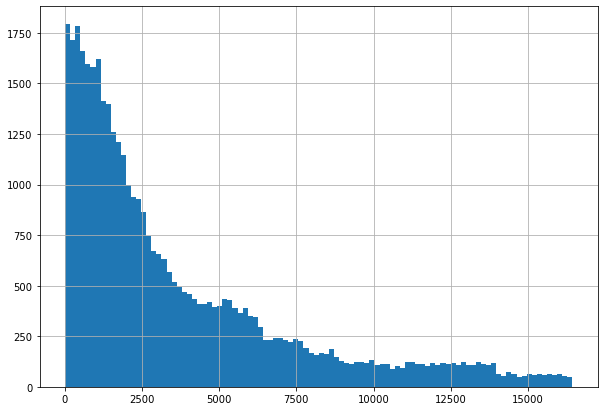

In [124]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

<AxesSubplot:>

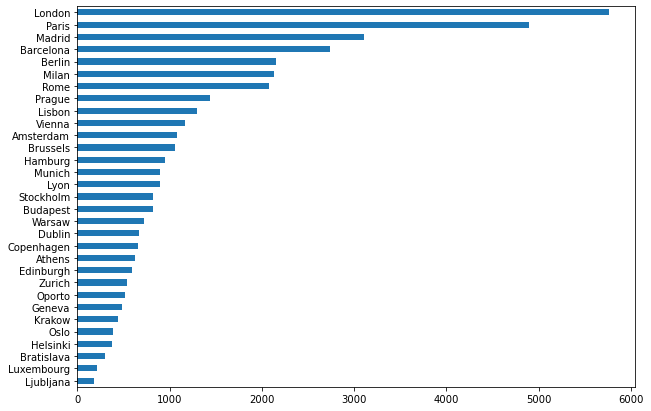

In [125]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

Посмотрим, как изменится распределение в большом городе:

<AxesSubplot:>

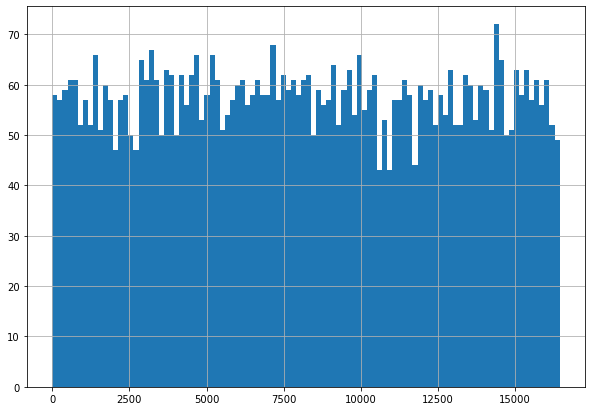

In [126]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

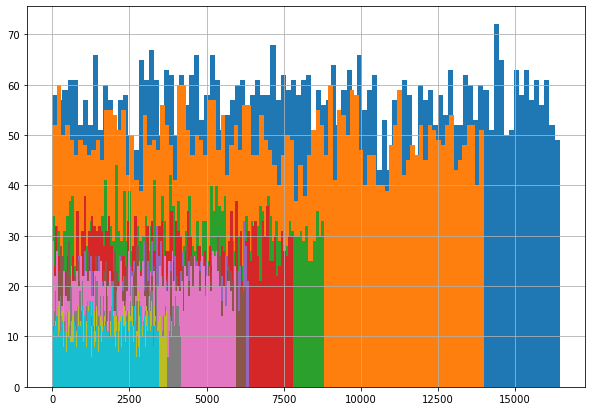

In [127]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

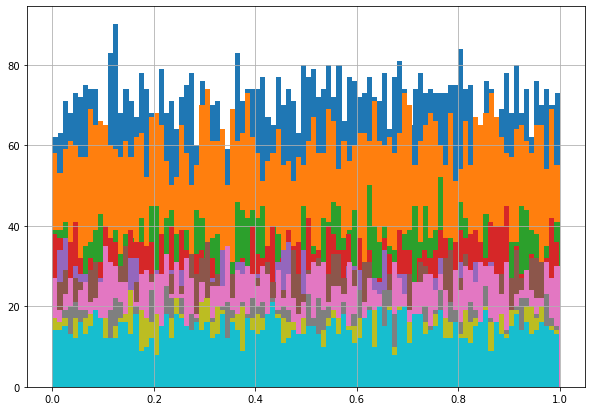

In [128]:
#  Посмотрим, как выглядит график после преобразования
for x in (data['City'].value_counts())[0:10].index:
    data['Ranking_norm'][data['City'] == x].hist(bins=100)
plt.show()

### Посмотрим распределение целевой переменной

<AxesSubplot:>

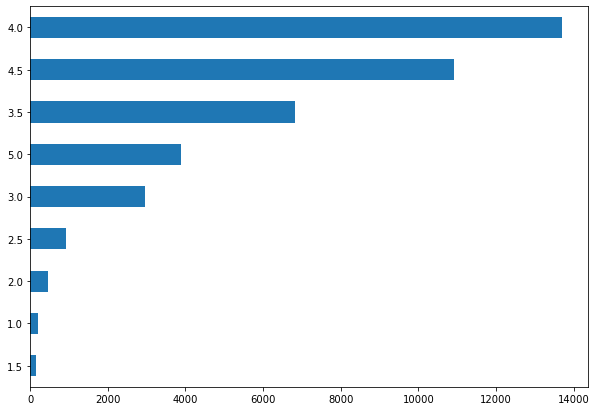

In [129]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

<AxesSubplot:>

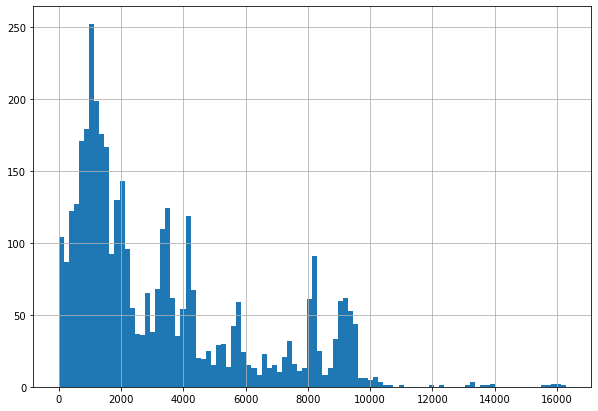

In [130]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

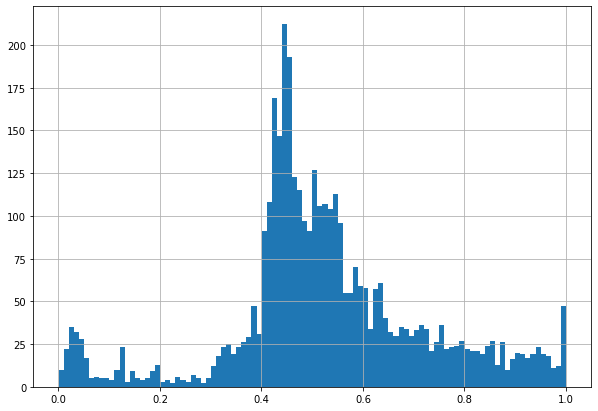

In [131]:
# Так выглядит распределение максимального рейтинга относительно нормализованного ранкинга
data['Ranking_norm'][data['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

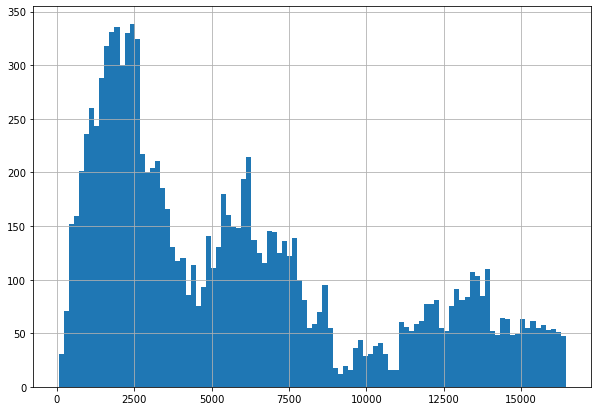

In [132]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

Поскольку разные города имеют различное количество ресторанов, на графике выше видно несколько "горок" и "ям"

<AxesSubplot:>

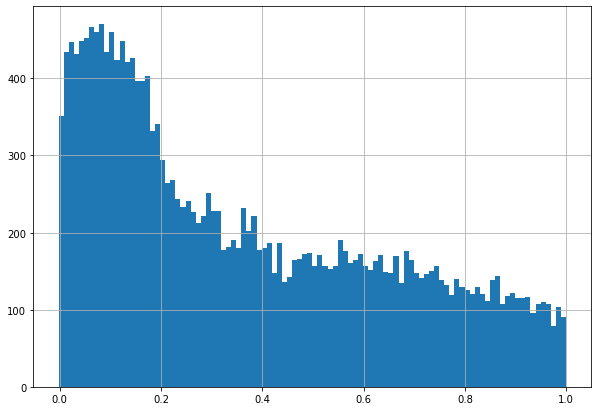

In [133]:
# Новый признак Ranking_norm позволил совместить масштабность
# Теперь видно относительно нормальное распределение
data['Ranking_norm'][data['Rating'] < 4].hist(bins=100)

### Корреляция признаков
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

<AxesSubplot:>

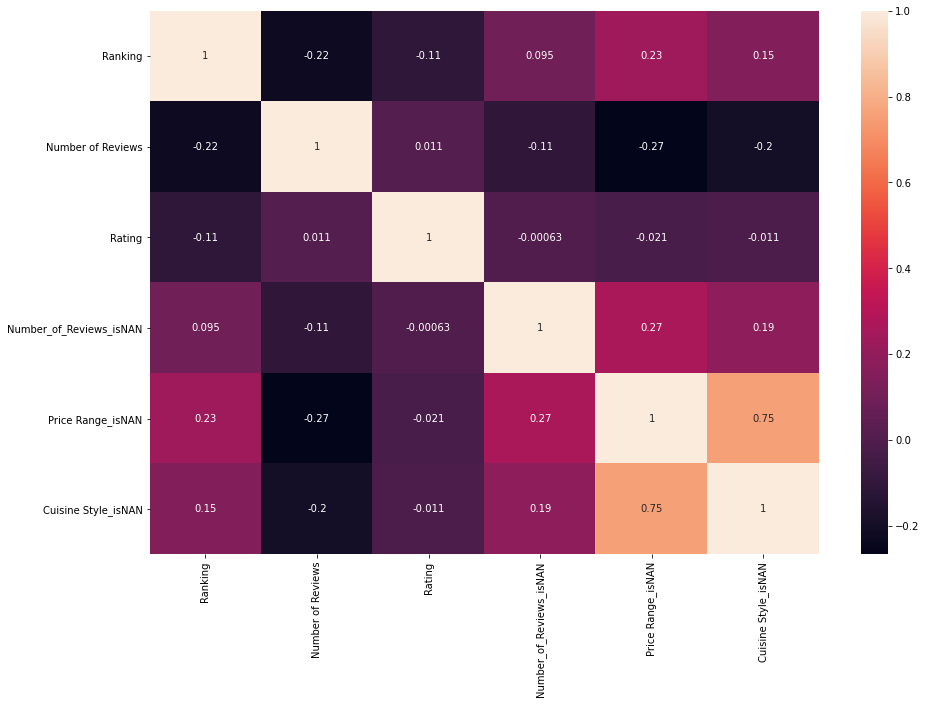

In [134]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data_filled.drop(['sample',], axis=1).corr(),annot=True)

На рейтинг наибольшее влияние оказывает ранкинг. Наличие пропусков ценовой категории и типов кухни коррелируют с собой, но это не вносит существенной разницы для нас

<AxesSubplot:>

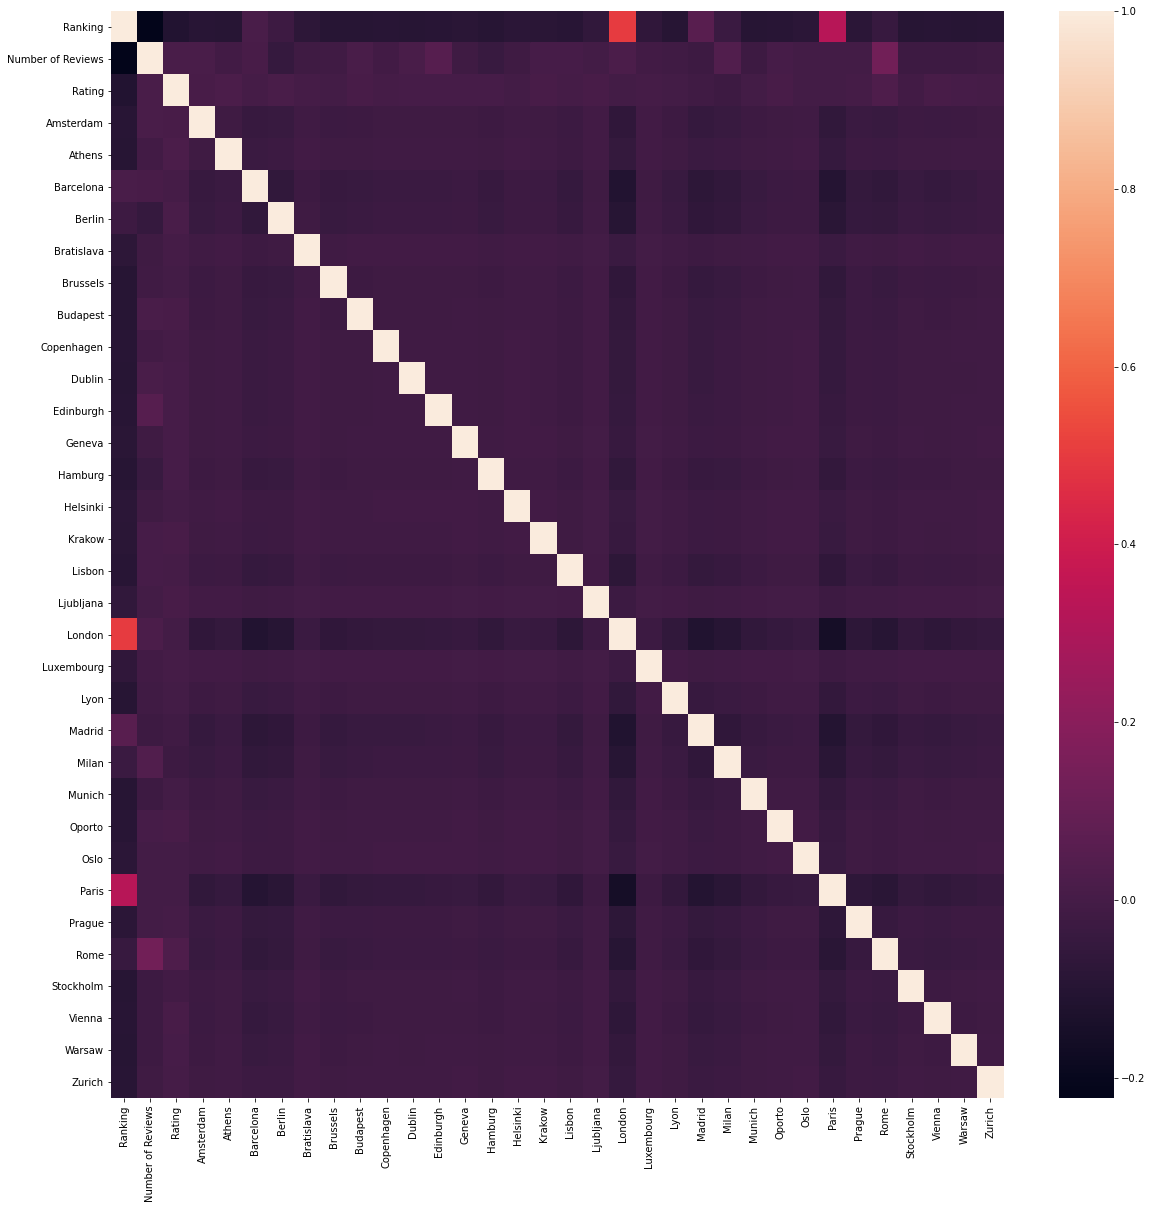

In [135]:
plt.rcParams['figure.figsize'] = (20,20)
sns.heatmap(data_city.drop(['sample','Price Range_isNAN','Cuisine Style_isNAN','Number_of_Reviews_isNAN'], axis=1).corr(),)

С добавлением большого количества признаков достаточно тяжело рассмотреть зависимость между ними. Выше используются данные еще до нормализации признака Ranking, возможно поэтому видна сильная зависимость Rankig и больших городов (Лондона, Парижа, Мадрида)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [136]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data = pd.merge(data,top_eat,how='left', on='City') # добавим внешние данные
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
 11  Unnamed: 0         50000 non-null  int64  
 12  Country            50000 non-null  object 
 13  Eat_rank           50000 non-null  int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 5.7+ MB


In [137]:
def price_converting(z):
    if z == '$':
        return 1
    if z == '$$ - $$$':
        return 2
    if z == '$$$$':
        return 3
    
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем ненужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(0, inplace=True)
    df_output['Price Range'].fillna('$$ - $$$', inplace=True)
    df_output['Cuisine Style'].fillna("'Unknown'", inplace=True)
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.concat([df_output, pd.get_dummies(df_output.City)], axis = 1)
    df_cuisines = data['Cuisine Style'].str.get_dummies(sep = ",")
    df_output = pd.concat([df_output, df_cuisines], axis = 1)
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код на генерацию новых фитчей
    df_output['Price_number'] = df_output['Price Range'].apply(price_converting)
    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(lambda x: x.replace('[',''))
    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(lambda x: x.replace(']',''))
    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(lambda x: x.replace(' ',''))
    df_output['Cuisines List'] = df_output['Cuisine Style'].apply(lambda x: x.split(','))
    df_output['Cuisines Number'] = df_output['Cuisines List'].apply(lambda x: len(x))
    df_output['Range'] = df_output['City'].apply(lambda x: df_output.Ranking[df_output['City'] == x].max() - 1)
    df_output['Ranking_norm'] = 1 - (df_output.Ranking / df_output.Range)
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

In [138]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Number of Reviews,sample,Rating,Unnamed: 0,Eat_rank,Amsterdam,Athens,Barcelona,Berlin,...,['Venezuelan',['Venezuelan'],['Vietnamese',['Vietnamese'],['Wine Bar',['Wine Bar'],Price_number,Cuisines Number,Range,Ranking_norm
48875,11932.0,5.0,1,4.0,2,8,0,0,0,0,...,0,0,0,0,0,0,2,3,16443.0,0.274342
43687,1492.0,882.0,1,4.0,9,20,0,0,0,0,...,0,0,0,0,0,0,2,5,5947.0,0.749117
25021,2274.0,84.0,1,4.0,21,18,0,0,0,0,...,0,0,0,0,0,0,2,5,3716.0,0.388052
28849,938.0,5.0,1,5.0,1,1,0,0,0,0,...,0,0,0,0,0,0,2,1,2463.0,0.619164
33660,389.0,43.0,1,4.5,8,16,0,0,0,0,...,0,0,0,0,0,0,1,4,3443.0,0.887017
30211,3374.0,97.0,1,4.0,0,19,0,0,0,0,...,0,0,0,0,0,0,2,4,13985.0,0.758742
8437,332.0,18.0,0,0.0,26,0,0,0,0,0,...,0,0,0,0,0,0,3,1,1412.0,0.764873
35041,1409.0,3.0,1,4.5,20,15,0,0,0,0,...,0,0,0,0,0,0,2,1,2736.0,0.485015
34064,848.0,291.0,1,3.5,13,14,0,0,0,0,...,0,0,0,0,0,0,2,3,3005.0,0.717804
35574,2085.0,145.0,1,4.0,9,20,0,0,0,0,...,0,0,0,0,0,0,2,2,5947.0,0.649403


In [139]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Columns: 473 entries, Ranking to Ranking_norm
dtypes: float64(5), int64(437), uint8(31)
memory usage: 170.5 MB


In [140]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values # наш таргет
X = train_data.drop(['Rating'], axis=1)

Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.

In [141]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [142]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 472), (40000, 472), (40000, 471), (32000, 471), (8000, 471))

# Model 
Сам ML

In [143]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [144]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [145]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [147]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.203705625


<AxesSubplot:>

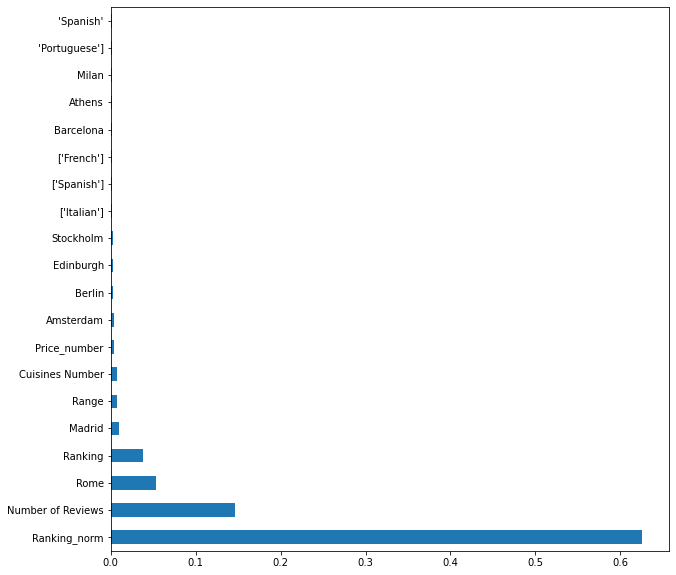

In [74]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

Преобразованные данные из ранкинга оказались наиболее влиящими на целевую переменную

# Submission
Готовим Submission на кагл

In [148]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,Unnamed: 0,Eat_rank,Amsterdam,Athens,Barcelona,Berlin,Bratislava,...,['Venezuelan',['Venezuelan'],['Vietnamese',['Vietnamese'],['Wine Bar',['Wine Bar'],Price_number,Cuisines Number,Range,Ranking_norm
2458,1162.0,266.0,0.0,6,20,0,0,0,0,0,...,0,0,0,0,0,0,2,2,6274.0,0.814791
1711,9751.0,34.0,0.0,0,19,0,0,0,0,0,...,0,0,0,0,0,0,2,2,13985.0,0.302753
6387,9742.0,7.0,0.0,2,8,0,0,0,0,0,...,0,0,0,0,0,0,2,1,16443.0,0.407529
2466,7771.0,6.0,0.0,10,18,0,0,1,0,0,...,0,0,0,0,0,0,2,1,7795.0,0.003079
2927,845.0,46.0,0.0,13,14,0,0,0,0,0,...,0,0,0,0,0,0,2,5,3005.0,0.718802
372,1253.0,32.0,0.0,8,16,0,0,0,0,0,...,0,0,0,0,0,0,2,2,3443.0,0.636073
2453,4982.0,133.0,0.0,6,20,0,0,0,0,0,...,0,0,0,0,0,0,2,6,6274.0,0.205929
3619,910.0,883.0,0.0,9,20,0,0,0,0,0,...,0,0,0,0,0,0,2,6,5947.0,0.846982
314,882.0,54.0,0.0,26,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,1412.0,0.375354
3913,212.0,145.0,0.0,19,19,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2665.0,0.920450


In [149]:
test_data = test_data.drop(['Rating'], axis=1)

In [150]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [151]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [152]:
predict_submission

array([3.065, 4.175, 4.365, ..., 3.05 , 4.495, 4.24 ])

In [153]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.065
1,id_1,4.175
2,id_2,4.365
3,id_3,4.280
4,id_4,4.485
5,id_5,4.490
6,id_6,2.145
7,id_7,3.080
8,id_8,4.175
9,id_9,4.745
